# Last update on the 6th of April 2021
# Corona virus vaccinations in the world

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

plt.style.use('fivethirtyeight')
%matplotlib inline

/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


In [2]:
full_df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
full_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Zimbabwe,ZWE,2021-03-29,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9572,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9573,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9574,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              9576 non-null   object 
 1   iso_code                             9576 non-null   object 
 2   date                                 9576 non-null   object 
 3   total_vaccinations                   5772 non-null   float64
 4   people_vaccinated                    5167 non-null   float64
 5   people_fully_vaccinated              3608 non-null   float64
 6   daily_vaccinations_raw               4816 non-null   float64
 7   daily_vaccinations                   9393 non-null   float64
 8   total_vaccinations_per_hundred       5772 non-null   float64
 9   people_vaccinated_per_hundred        5167 non-null   float64
 10  people_fully_vaccinated_per_hundred  3608 non-null   float64
 11  daily_vaccinations_per_million

**1. What country has vaccinated more people? 
Or how many daily vaccinations are there per country if we sort by total vaccinations mean and sum values? And what countries are top 10?******

There are some columns with a lot of missing data. Thus, for us the most important columns are: country, date, vaccines (no missing values) and daily_vaccinations_per_million and daily_vaccinations. 

Exploring the list of countries in the table shows that there are some duplicates - like having data for England, Scotland, Wales and Northern Island from the one hand, and for the UK from the other hand. We want to delete some data, only the UK data will be in use.

In [4]:
country_list = full_df.country.unique().tolist()
print(country_list)
full_df = full_df[full_df.country.apply(lambda x: x not in ['England', 
                            'Scotland', 'Wales', 'Northern Ireland'])]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan', 'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia', 'Faeroe Islands', 'Falkland Islands', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Laos', 'Latvia', 'Lebanon'

In [5]:
daily = full_df.loc[:,['country', 'date', 'vaccines', 'daily_vaccinations']].dropna(subset=['daily_vaccinations'])
daily["date"] = pd.to_datetime(daily["date"], format = '%Y-%m-%d')

daily_agg = daily.groupby('country').daily_vaccinations.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')


full_daily = daily.merge(daily_agg, on = 'country')
full_daily

,country,date,vaccines,daily_vaccinations,sum_vaccination_amt,mean_vaccination_amt
0,Afghanistan,2021-02-23,Oxford/AstraZeneca,1367.0,49509.0,2250.409091
1,Afghanistan,2021-02-24,Oxford/AstraZeneca,1367.0,49509.0,2250.409091
2,Afghanistan,2021-02-25,Oxford/AstraZeneca,1367.0,49509.0,2250.409091
3,Afghanistan,2021-02-26,Oxford/AstraZeneca,1367.0,49509.0,2250.409091
4,Afghanistan,2021-02-27,Oxford/AstraZeneca,1367.0,49509.0,2250.409091
...,...,...,...,...,...,...
8948,Zimbabwe,2021-03-29,Sinopharm/Beijing,5434.0,92971.0,2162.116279
8949,Zimbabwe,2021-03-30,Sinopharm/Beijing,5810.0,92971.0,2162.116279
8950,Zimbabwe,2021-03-31,Sinopharm/Beijing,5712.0,92971.0,2162.116279
8951,Zimbabwe,2021-04-01,Sinopharm/Beijing,6617.0,92971.0,2162.116279


Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by mean values)')

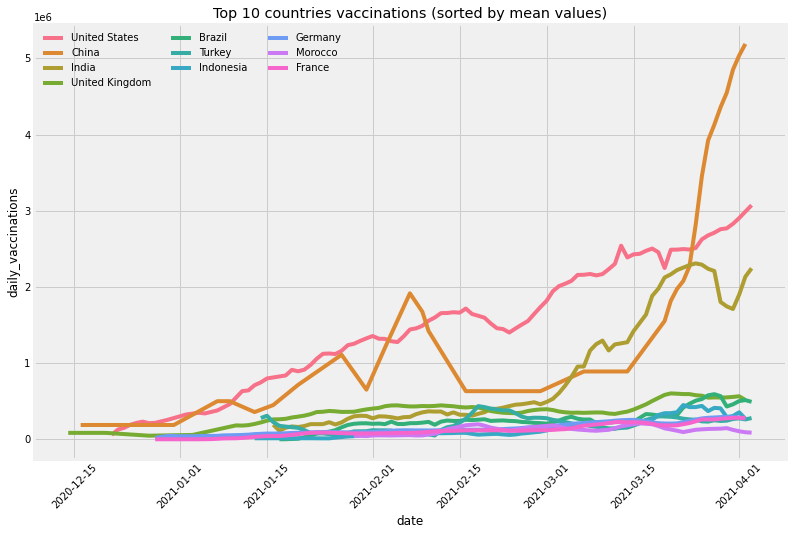

In [6]:
sort = daily_agg.sort_values(by = 'mean_vaccination_amt', ascending = False).reset_index()
countries = sort.country.to_list()

graphing_mean = full_daily.sort_values(by = 'mean_vaccination_amt', ascending = False)
top10_mean = graphing_mean[graphing_mean['country'].isin(countries[:10])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'country', 
    data = top10_mean)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by mean values)')

Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by total amount of vaccinations)')

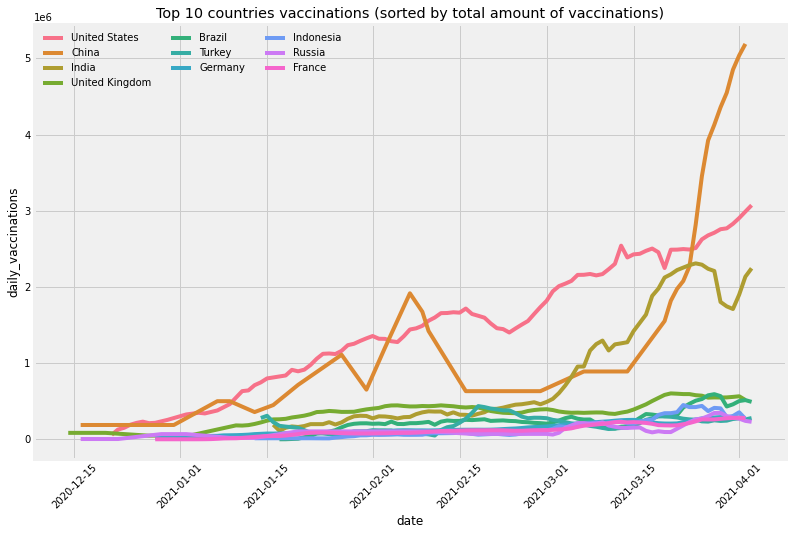

In [7]:
sort_sum = daily_agg.sort_values(by = 'sum_vaccination_amt', ascending = False).reset_index()
countries_sum = sort_sum.country.to_list()

graphing_sum = full_daily.sort_values(by = 'sum_vaccination_amt', ascending = False)
top10_sum = graphing_sum[graphing_sum['country'].isin(countries_sum[:10])]
top40_sum = graphing_sum[graphing_sum['country'].isin(countries_sum[:40])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'country', 
    data = top10_sum)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by total amount of vaccinations)')

Answering the first question we can say that the first 7 positions are hold by the same countries - the United States, China, India, the UK, Brazil, Turkey and Germany. And there is a bit difference in the next positions, there are such countries like France, Russia, Indonesia and Morocco. 
The main trend here is increasing of numbers of daily vaccinations even though there some local peaks for China. And this is very understandable - the more the population is - the more patients are there.

**2. How many vaccinations are there per country per million people (total value)? In other words, which countries have vaccinated the biggest proportion of their populations?**

Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by total amount of vaccinations per million)')

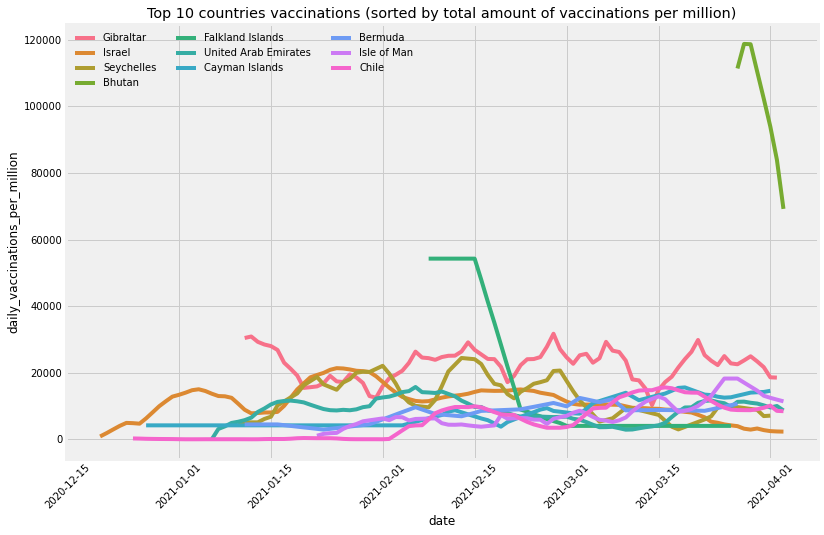

In [8]:
daily_mil = full_df.loc[:,['country', 'date', 
    'daily_vaccinations_per_million']].dropna(subset=['daily_vaccinations_per_million'])
daily_mil["date"] = pd.to_datetime(daily_mil["date"], format = '%Y-%m-%d')

daily_agg_mil = daily_mil.groupby('country').daily_vaccinations_per_million.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')

full_daily_mil = daily_mil.merge(daily_agg_mil, on = 'country')


sorted_sum = daily_agg_mil.sort_values(by = 'sum_vaccination_amt', ascending = False).reset_index()
countries_sum_mil = sorted_sum.country.to_list()

graphing_sum_mil = full_daily_mil.sort_values(by = 'sum_vaccination_amt', ascending = False)
top10_sum_mil = graphing_sum_mil[graphing_sum_mil['country'].isin(countries_sum_mil[:10])]
top40_sum_mil = graphing_sum_mil[graphing_sum_mil['country'].isin(countries_sum_mil[:40])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations_per_million', hue = 'country', 
    data = top10_sum_mil)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by total amount of vaccinations per million)')

If we take into consideration 2 previous graphs, than we can see that absolute numbers are true in vaccinations per million only in case of Israel (it was true also for the United Kingdom till the end of March). Such huge countries like the US, India or China are far away from vaccinatig big percent of their populations. The best job so far is done by Gibraltar, Bhutan and Israel.

Let's have a look at total numbers of vaccinations per country and total vaccinations per million per country and see where the leaders are and how far are the rest of top 40 countries. 

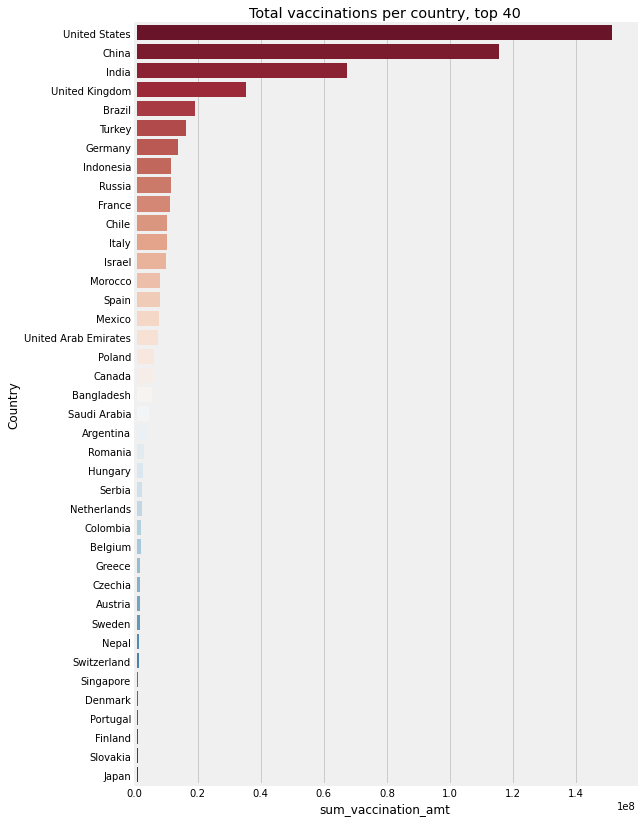

In [9]:
plt.figure(figsize=(8,14))
sns.barplot(x=top40_sum['sum_vaccination_amt'], y=top40_sum['country'], palette="RdBu")
plt.xlabel("sum_vaccination_amt")
plt.ylabel("Country")
plt.title("Total vaccinations per country, top 40")
plt.show()

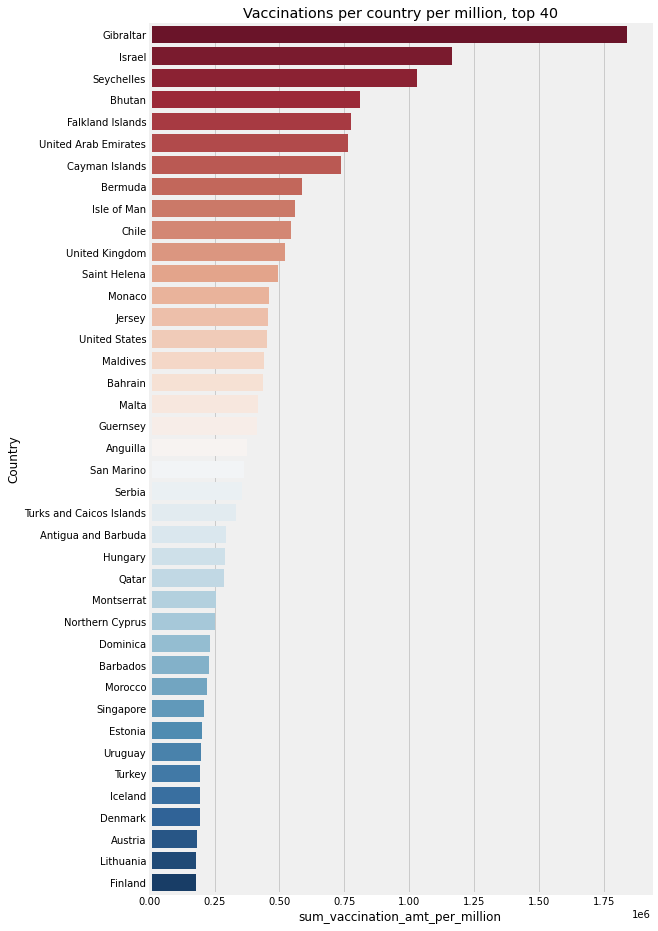

In [10]:
plt.figure(figsize=(8,16))
sns.barplot(x=top40_sum_mil['sum_vaccination_amt'], y=top40_sum_mil['country'], palette="RdBu")
plt.xlabel("sum_vaccination_amt_per_million")
plt.ylabel("Country")
plt.title("Vaccinations per country per million, top 40")
plt.show()

In [11]:
data = full_daily.groupby('vaccines')['sum_vaccination_amt'].sum()
data = pd.DataFrame(data).reset_index()
data = data.sort_values(by = 'sum_vaccination_amt', ascending = False).reset_index()

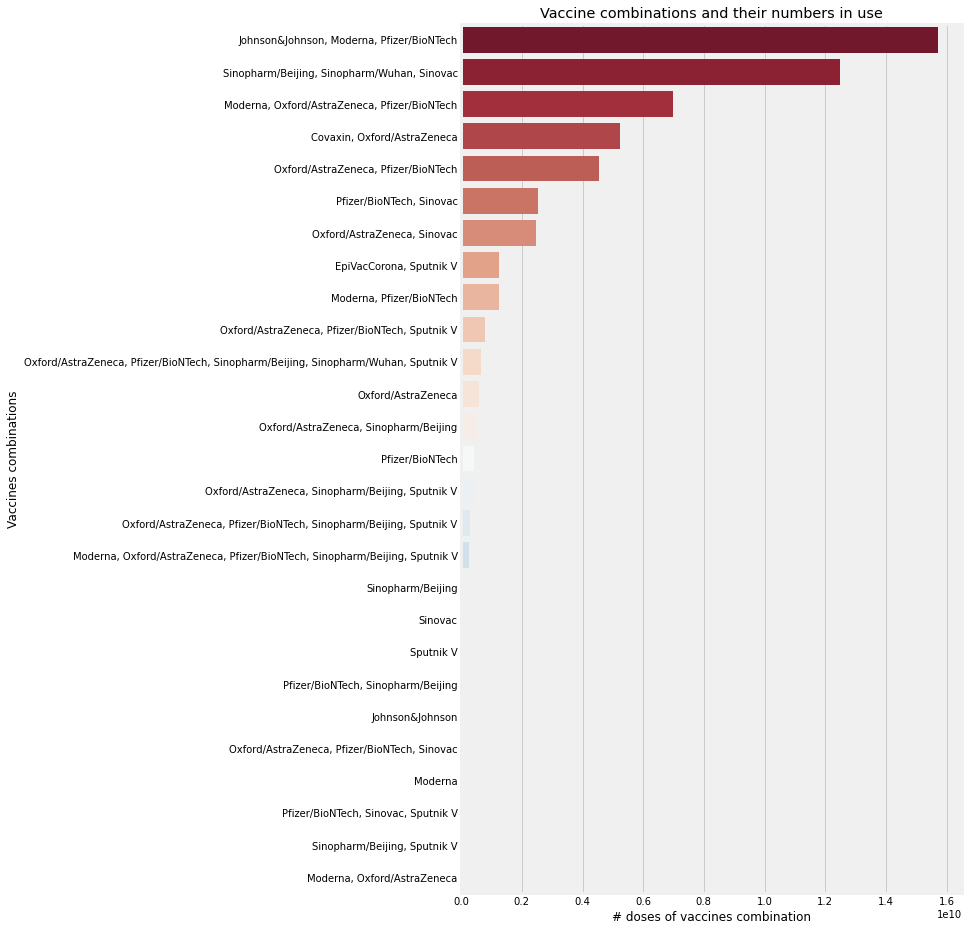

In [12]:
plt.figure(figsize=(8,16))
sns.barplot(x=data['sum_vaccination_amt'], y=data['vaccines'], palette="RdBu")
plt.xlabel("# doses of vaccines combination")
plt.ylabel("Vaccines combinations")
plt.title("Vaccine combinations and their numbers in use")
plt.show()

**3. What vaccines are used and in which countries?**

In [13]:
vaccines = full_daily.loc[:,['country', 'vaccines']]
vaccines = vaccines.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()
vaccines

,vaccines,country
0,"Covaxin, Oxford/AstraZeneca",[India]
1,"EpiVacCorona, Sputnik V",[Russia]
2,Johnson&Johnson,[South Africa]
3,"Johnson&Johnson, Moderna, Pfizer/BioNTech",[United States]
4,Moderna,[Guatemala]
5,"Moderna, Oxford/AstraZeneca",[Honduras]
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
7,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Hungary]
8,"Moderna, Pfizer/BioNTech","[Faeroe Islands, Israel, Liechtenstein, Singap..."
9,Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."


Here is the list of vaccine combinations and countries that use those combinations. In the next cell you can see the same data on the map.

In [14]:
d = {}
for i in vaccines["vaccines"].unique():
    d[i] = [vaccines["country"][j] for j in vaccines[vaccines["vaccines"]==i].index]
d

{'Covaxin, Oxford/AstraZeneca': [array(['India'], dtype=object)],
 'EpiVacCorona, Sputnik V': [array(['Russia'], dtype=object)],
 'Johnson&Johnson': [array(['South Africa'], dtype=object)],
 'Johnson&Johnson, Moderna, Pfizer/BioNTech': [array(['United States'], dtype=object)],
 'Moderna': [array(['Guatemala'], dtype=object)],
 'Moderna, Oxford/AstraZeneca': [array(['Honduras'], dtype=object)],
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech': [array(['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Czechia', 'Denmark',
         'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
         'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
         'Netherlands', 'Norway', 'Palestine', 'Poland', 'Portugal',
         'Romania', 'Rwanda', 'Spain'], dtype=object)],
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V': [array(['Hungary'], dtype=object)],
 'Moderna, Pfizer/BioNTech': [array(['Faeroe Islands', 'Israel', 'Liechtenstein', 'Singapore

In [15]:
title = "Popular Vaccines"
data = full_daily
fig = ex.choropleth(data, 
            locations="country", 
            locationmode='country names',
            color="vaccines", 
            hover_name="country", 
                   )


fig.update_layout(title=title, 
            title_x=0.5,
            legend_orientation = 'h'
)
fig.show()